In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
from common.src.main.python.utils.hdfs_generic import *
import os

MAX_N_EXECUTORS=15
MIN_N_EXECUTORS=1
N_CORES_EXECUTOR=4
EXECUTOR_IDLE_MAX_TIME=120
EXECUTOR_MEMORY='32g'
DRIVER_MEMORY='16g'
N_CORES_DRIVER=1
MEMORY_OVERHEAD=N_CORES_EXECUTOR*2048
#QUEUE="root.datascience.normal"
QUEUE="root.BDPtenants.es.medium"

BDA_CORE_VERSION="1.0.0"

SPARK_COMMON_OPTS=os.environ.get('SPARK_COMMON_OPTS', '')
SPARK_COMMON_OPTS+=" --executor-memory %s --driver-memory %s" % (EXECUTOR_MEMORY, DRIVER_MEMORY)
SPARK_COMMON_OPTS+=" --conf spark.shuffle.manager=tungsten-sort"
SPARK_COMMON_OPTS+="  --queue %s" % QUEUE
APP_NAME='new_portability_model'

# Dynamic allocation configuration
SPARK_COMMON_OPTS+=" --conf spark.driver.allowMultipleContexts=true"
SPARK_COMMON_OPTS+=" --conf spark.dynamicAllocation.enabled=true"
SPARK_COMMON_OPTS+=" --conf spark.shuffle.service.enabled=true"
SPARK_COMMON_OPTS+=" --conf spark.dynamicAllocation.maxExecutors=%s" % (MAX_N_EXECUTORS)
SPARK_COMMON_OPTS+=" --conf spark.dynamicAllocation.minExecutors=%s" % (MIN_N_EXECUTORS)
SPARK_COMMON_OPTS+=" --conf spark.dynamicAllocation.executorIdleTimeout=%s" % (EXECUTOR_IDLE_MAX_TIME)
SPARK_COMMON_OPTS+=" --conf spark.ui.port=58201"
SPARK_COMMON_OPTS+=" --conf spark.port.maxRetries=200"
SPARK_COMMON_OPTS+=" --executor-cores=%s" % (N_CORES_EXECUTOR)
SPARK_COMMON_OPTS+=" --conf spark.app.name=%s" % (APP_NAME)

BDA_ENV = os.environ.get('BDA_USER_HOME', '')

# Attach bda-core-ra codebase
SPARK_COMMON_OPTS+=" --files \
{}/scripts/properties/red_agent/nodes.properties,\
{}/scripts/properties/red_agent/nodes-de.properties,\
{}/scripts/properties/red_agent/nodes-es.properties,\
{}/scripts/properties/red_agent/nodes-ie.properties,\
{}/scripts/properties/red_agent/nodes-it.properties,\
{}/scripts/properties/red_agent/nodes-pt.properties,\
{}/scripts/properties/red_agent/nodes-uk.properties".format(*[BDA_ENV]*7)

os.environ["SPARK_COMMON_OPTS"] = SPARK_COMMON_OPTS
os.environ["PYSPARK_SUBMIT_ARGS"] = "%s pyspark-shell " % SPARK_COMMON_OPTS

#print os.environ.get('SPARK_COMMON_OPTS', '')
#print os.environ.get('PYSPARK_SUBMIT_ARGS', '')

sc, sparkSession, sqlContext = run_sc()
print sc.defaultParallelism

KeyboardInterrupt: 

In [ ]:
# This literal_eval is needed since 
# we have to read from a textfile
# which is formatted as python objects.
# It is totally safe.
from ast import literal_eval

# Standard Library stuff:
from functools import partial
from datetime import date, timedelta, datetime

# Numpy stuff
from numpy import (nan as np_nan, round as np_round, int64 as np_int64)
import numpy as np


# Spark stuff
from pyspark.sql import SparkSession
from pyspark import StorageLevel
from pyspark.sql.functions import (udf, col, decode, when, lit, lower, upper, concat,
                                   translate, count, sum as sql_sum, max as sql_max, min as sql_min,
                                   round, 
                                   mean, stddev, datediff,
                                   length,
                                   countDistinct,
                                   hour, date_format, collect_set, collect_list,
                                   year, month, dayofmonth,
                                   rank, expr, lag, coalesce, row_number,
                                   isnull, isnan,
                                   unix_timestamp,
                                   regexp_replace
                                  )

from pyspark.sql.types import DoubleType, StringType, IntegerType, ArrayType, FloatType, StructType, StructField

from pyspark.ml.feature import StringIndexer
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.linalg import Vectors
from pyspark.ml import Pipeline

from pyspark.ml import Pipeline

from pyspark.sql.functions import row_number, col

from pyspark.sql import DataFrameStatFunctions as statFunc

from pyspark.sql.window import Window

import json
from collections import OrderedDict

from subprocess import Popen, PIPE
import datetime, calendar
from pyspark.sql import functions as F
import datetime as dt

from pyspark.ml.feature import StandardScaler

In [ ]:
import sys

from common.src.main.python.utils.hdfs_generic import *
import argparse
import os
import time
# Spark utils
from pyspark.sql.functions import (udf, col, decode, when, lit, lower, concat,
                                   translate, count, max, avg, min as sql_min,
                                   greatest,
                                   least,
                                   isnull,
                                   isnan,
                                   struct,
                                   substring,
                                   size,
                                   length,
                                   year,
                                   month,
                                   dayofmonth,
                                   unix_timestamp,
                                   date_format,
                                   from_unixtime,
                                   datediff,
                                   to_date,
                                   desc,
                                   asc,
                                   countDistinct,
                                   row_number,
                                   regexp_replace,
                                   lpad,
                                   rpad,
                                   trim,
                                   split,
                                   coalesce,
                                   array)
from pyspark.sql import Row, DataFrame, Column, Window
from pyspark.sql.types import DoubleType, StringType, IntegerType, DateType, ArrayType
# from pyspark.ml import Pipeline
# from pyspark.ml.classification import RandomForestClassifier
# from pyspark.ml.feature import StringIndexer, VectorIndexer, VectorAssembler, SQLTransformer, OneHotEncoder
# from pyspark.ml.evaluation import MulticlassClassificationEvaluator, BinaryClassificationEvaluator
# from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
import datetime as dt

In [ ]:
spark = (SparkSession.builder
         .master("yarn")
         .config("spark.submit.deployMode", "client")
         .config("spark.ui.showConsoleProgress", "true")
         .enableHiveSupport()
         .getOrCreate()
         )

# sc = spark.sparkContext

In [ ]:
%load_ext autoreload
%autoreload 2

#import re
import subprocess
#import sys
import time

from IPython.display import HTML, display
import tabulate

def printHTML(df, sample=7):
    display(HTML(tabulate.tabulate([df.columns]+df.take(sample), tablefmt='html', headers='firstrow')))
    
# Spark utils
from pyspark.sql.functions import (array_contains, bround, col, collect_set, concat, count, decode, desc, 
                                   isnull, length, lit, lower, lpad, max as sql_max, 
                                   size, struct, substring, sum as sql_sum, 
                                   translate, trim, udf, upper, when
                                  )
from pyspark.sql.types import DoubleType, IntegerType, StringType, StructField, StructType

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
USECASES_SRC = os.path.join(os.environ.get('BDA_USER_HOME', ''), "repositorios", "use-cases")
if USECASES_SRC not in sys.path: 
    sys.path.append(USECASES_SRC)

In [ ]:
PYKHAOS_SRC = os.path.join(os.environ.get('BDA_USER_HOME', ''), "repositorios")
if PYKHAOS_SRC not in sys.path: 
    sys.path.append(PYKHAOS_SRC)

# Saco ids de train y test con las variables numéricas a incluir

In [ ]:
import sys

sys.path.append("/var/SP/data/home/carnaum2/ids/amdocs_inf_dataset")

In [ ]:
from src.main.python.configuration.constants import ENVIRONMENT
from src.main.python.utils.spark_creator import SparkCreator
from src.main.python.pipelines.billing import Billing
from src.main.python.pipelines.breakdowns import Breakdowns
from src.main.python.pipelines.call_centre_calls import CallCentreCalls
from src.main.python.pipelines.campaigns import Campaigns
from src.main.python.pipelines.claims import Claims
from src.main.python.pipelines.competitors_web import CompWeb
from src.main.python.pipelines.customer import Customer
from src.main.python.pipelines.customer_aggregations import Customer_Aggregations
from src.main.python.pipelines.penalties import PenaltiesCustomer, PenaltiesServices
from src.main.python.pipelines.device_catalogue import Device_Catalogue
from src.main.python.pipelines.geneva_traffic import GenevaVoiceTypeUsage
from src.main.python.pipelines.geneva_traffic import GenevaVoiceUsage
from src.main.python.pipelines.geneva_traffic import GenevaRoamVoiceUsage
from src.main.python.pipelines.geneva_traffic import GenevaDataUsage
from src.main.python.pipelines.geneva_traffic import GenevaRoamDataUsage
from src.main.python.pipelines.mobile_spinners_extractor import Mobile_spinners_extractor
from src.main.python.pipelines.netscout import Netscout
from src.main.python.pipelines.orders import Orders
from src.main.python.pipelines.orders_aggregations import OrdersAgg
from src.main.python.pipelines.permsandprefs import Perms_and_prefs
from src.main.python.pipelines.services import Services
from src.main.python.pipelines.services_problems import ServiceProblems
from src.main.python.pipelines.tech_suprt import TechSupport
from src.main.python.pipelines.tgs import Tgs
from src.main.python.pipelines.tnps import Tnps
from src.main.python.pipelines.orders_sla import Orders_sla
from src.main.python.pipelines.tickets import Tickets
from src.main.python.pipelines.refund import Refund
sc = SparkCreator()
date = "20191014"
module_constructors = (Customer(sc, date, ENVIRONMENT),
                       Services(sc, date, ENVIRONMENT),
                       Customer_Aggregations(sc, date, ENVIRONMENT),
                       Billing(sc, date, ENVIRONMENT),
                       Campaigns(sc, date, date, ENVIRONMENT),
                       GenevaVoiceTypeUsage(sc, date, date, ENVIRONMENT),
                       GenevaVoiceUsage(sc, date, date, ENVIRONMENT),
                       GenevaDataUsage(sc, date, date, ENVIRONMENT),
                       #GenevaRoamVoiceUsage(sc, date, date, ENVIRONMENT),
                       #GenevaRoamDataUsage(sc, date, date, ENVIRONMENT),
                       Orders(sc, date, date, ENVIRONMENT),
                       OrdersAgg(sc, date, date, ENVIRONMENT),
                       PenaltiesCustomer(sc, date, ENVIRONMENT),
                       PenaltiesServices(sc, date, ENVIRONMENT),
                       Device_Catalogue(sc, date, date, ENVIRONMENT),
                       Perms_and_prefs(sc, date, ENVIRONMENT),
                       CallCentreCalls(sc, date, date, ENVIRONMENT),
                       Tnps(sc, date, date, ENVIRONMENT),
                       Tgs(sc, date, ENVIRONMENT),
                       Claims(sc, date, ENVIRONMENT),
                       Breakdowns(sc, date, ENVIRONMENT),
                       TechSupport(sc, date, ENVIRONMENT),
                       Netscout(sc, date, date, ENVIRONMENT),
                       CompWeb(sc, date, date, ENVIRONMENT),
                       ServiceProblems(sc, date, ENVIRONMENT),
                       Mobile_spinners_extractor(sc, date, ENVIRONMENT),
                       Orders_sla(sc, date, ENVIRONMENT),
                       Refund(sc, date, ENVIRONMENT),
                       #Tickets(sc, date, ENVIRONMENT)
                       )
na_map = {}
for module in module_constructors:
    metadata = module.set_module_metadata()
    na_map.update(metadata)
final_map = {colmn: na_map[colmn][0] for colmn in na_map.keys()
             if colmn in na_map.keys() and na_map[colmn][1] != "id"}
categ_map = {colmn: na_map[colmn][0] for colmn in na_map.keys()
             if colmn in na_map.keys() and na_map[colmn][1] == "categorical"}
numeric_map = {colmn: na_map[colmn][0] for colmn in na_map.keys()
               if colmn in na_map.keys() and na_map[colmn][1] == "numerical"}
date_map = {colmn: na_map[colmn][0] for colmn in na_map.keys()
            if colmn in na_map.keys() and na_map[colmn][1] == "date"}

In [ ]:
numeric_variables=numeric_map.keys()
numeric_variables.append('msisdn') #añado el msisdn para hacer el join después

In [ ]:
def ids_numeric_selection(year_, month_, day_):

    ids_completo = (spark.read.load(
            '/data/udf/vf_es/amdocs_inf_dataset/amdocs_ids_service_level/year=' + year_ + '/month=' + month_ + '/day=' + day_))

    ids_numeric=ids_completo.select(numeric_variables) #aqui cojo las variables que se han seleccionado

    return ids_numeric

#Guardo este ids para train y test y luego hago inner join on msisdn con las columnas de target que habiamos creado

In [ ]:
ids_julio_numeric=ids_numeric_selection('2019','7','31')
ids_sept_numeric=ids_numeric_selection('2019','9','30') 

In [ ]:
'''
#OBTENER CLIENTES QUE LLEVEN ACTIVOS DESDE HACE 3 MESES:


#Inner join de la cartera actual con la de hace 3 meses


from churn.analysis.triggers.base_utils.base_utils import get_customer_base, _is_null_date, get_customers, get_services

base_df=get_customer_base(spark,fecha, add_columns = None, active_filter = True, add_columns_customer=None)
#en fecha pondremos la de 3 meses antes a la que queremos extraer (ej. para training cogeriamos el '20190430')
msisdn_fecha=base_df.select('msisdn').distinct() 

df_activos=ids_numeric.join(msisdn_fecha, on='msisdn',how='inner')
    
                    
'''

In [ ]:
categoricas=[item[0] for item in ids_julio_numeric.dtypes if item[1].startswith('string')] #elimino estas variables que no son numericas: no deberian aparecer (carlos lo va a corregir)

In [ ]:
ids_julio_numeric=ids_julio_numeric.drop('tgs_ind_riesgo_o2',
 'tgs_ind_riesgo_mm',
 'tgs_ind_riesgo_mv',
 'tgs_meses_fin_dto_ok',
 'CCC_L2_bucket_1st_interaction',
 'CCC_L2_bucket_latest_interaction',
 'CCC_L2_first_interaction',
 'Cust_Agg_flag_prepaid_nc',
 'tgs_ind_riesgo_max',
 'tgs_sol_24m',
 'CCC_L2_latest_interaction',
 'tgs_tg_marta',
 'tgs_blinda_bi_pos_n12')

ids_sept_numeric=ids_sept_numeric.drop('tgs_ind_riesgo_o2',
 'tgs_ind_riesgo_mm',
 'tgs_ind_riesgo_mv',
 'tgs_meses_fin_dto_ok',
 'CCC_L2_bucket_1st_interaction',
 'CCC_L2_bucket_latest_interaction',
 'CCC_L2_first_interaction',
 'Cust_Agg_flag_prepaid_nc',
 'tgs_ind_riesgo_max',
 'tgs_sol_24m',
 'CCC_L2_latest_interaction',
 'tgs_tg_marta',
 'tgs_blinda_bi_pos_n12')

## Filtramos por clientes activos con línea móvil 

In [ ]:
training_df=ids_julio_numeric.filter((col('Serv_RGU')=='mobile')&
                                   ((col('Cust_COD_ESTADO_GENERAL')=='01')|(col('Cust_COD_ESTADO_GENERAL')=='09')))

In [ ]:
validation_df=ids_sept_numeric.filter((col('Serv_RGU')=='mobile')&
                                   ((col('Cust_COD_ESTADO_GENERAL')=='01')|(col('Cust_COD_ESTADO_GENERAL')=='09')))

In [ ]:
training_df=training_df.cache()
training_df.count()

In [ ]:
validation_df=validation_df.cache()
validation_df.count()

# Etiquetamos training_df y validation_df

### Portas a dos meses con gap window de 15 días

In [ ]:
#MasMovil: MasMovil, Yoigo, Pepephone, Llamaya, Hits Mobile, Lebara

def crear_target_porta(df_no_etiquetado,fecha,spark):

    #Leemos la tabla de solicitudes de portabilidades
    
    solicitudes_portab_complete= spark.read.table('raw_es.portabilitiesinout_sopo_solicitud_portabilidad') #lectura de tabla de portabilidad
    
    
    #Nos quedamos con las solicitudes realizadas en el mes después al train (sin gap window)
    
    
    if (int(fecha[4:6]))=='11':
        
        solicitudes_portab_fecha =solicitudes_portab_complete.filter(((col('year') == int(fecha[0:4]))& (col('month') == int(fecha[4:6])+1)& (col('day') >14))|((col('month') == 1)& (col('year') ==int(fecha[0:4])+1)))
    
    
    elif (int(fecha[4:6]))=='12':
            
        solicitudes_portab_fecha =solicitudes_portab_complete.filter((col('year') == int(fecha[0:4])+1)&((((col('month') == 1)&(col('day') >14))) |(col('month') == 2)))                                              
   
    else:                                     
        solicitudes_portab_fecha =solicitudes_portab_complete.filter((col('year') == int(fecha[0:4]))& ((col('month') == int(fecha[4:6])+1)))
 
    
    #Aplicamos regla para que no se repitan msisdn: si un cliente ha solicitado porta más de una vez, nos quedamos con la última solicitud realizada
    
    window = Window.partitionBy('SOPO_DS_MSISDN1').orderBy(col('SOPO_DS_FECHA_SOLICITUD').desc())

    solicitudes_portab=solicitudes_portab_fecha.withColumn("rank", row_number().over(window)).filter(col("rank") == 1)

    
    #Cogemos los msisdn de los clientes que hacen porta a cada operador
    
    portabMasMovil=solicitudes_portab.filter((col("SOPO_CO_RECEPTOR") == "AMENA") & (col("SOPO_CO_NRN_RECEPTORVIR") == "735014")
            | (col("SOPO_CO_RECEPTOR") == "AMENA") & (col("SOPO_CO_NRN_RECEPTORVIR") == "735044")
            | (col("SOPO_CO_RECEPTOR") == "AIRTEL") & (col("SOPO_CO_NRN_RECEPTORVIR") == "725303")
            | (col("SOPO_CO_RECEPTOR") == "AMENA") & (col("SOPO_CO_NRN_RECEPTORVIR") == "735054")
            | (col("SOPO_CO_RECEPTOR") == "MOVISTAR") & (col("SOPO_CO_NRN_RECEPTORVIR") == "715501")
            | (col("SOPO_CO_RECEPTOR") == "YOIGO") & (col("SOPO_CO_NRN_RECEPTORVIR") == "0")
            | (col("SOPO_CO_RECEPTOR") == "AIRTEL") & (col("SOPO_CO_NRN_RECEPTORVIR") == "725503")                      
            | (col("SOPO_CO_RECEPTOR") == "VIZZAVI") & (col("SOPO_CO_NRN_RECEPTORVIR") == "970513")                      
            | (col("SOPO_CO_RECEPTOR") == "AIRTEL") & (col("SOPO_CO_NRN_RECEPTORVIR") == "725203") 
            | (col("SOPO_CO_RECEPTOR") == "VIZZAVI") & (col("SOPO_CO_NRN_RECEPTORVIR") == "970213"))


    idMasMovil=portabMasMovil.select('SOPO_DS_MSISDN1').collect() #seleccionamos msisdn

    clientesMasMovil=[] #guardamos msisdn en una lista

    for i in range(0,len(idMasMovil)):
        v=str(idMasMovil[i][0])
        clientesMasMovil.append(v)


    #Movistar: Movistar, Tuenti

    portabMovistar=solicitudes_portab.filter((col("SOPO_CO_RECEPTOR") == "MOVISTAR") & (col("SOPO_CO_NRN_RECEPTORVIR") == "0")
            | (col("SOPO_CO_RECEPTOR") == "MOVISTAR") & (col("SOPO_CO_NRN_RECEPTORVIR") == "715401")
            | (col("SOPO_CO_RECEPTOR") == "TUENTI_MOVIL") & (col("SOPO_CO_NRN_RECEPTORVIR") == "0"))



    idMovistar=portabMovistar.select('SOPO_DS_MSISDN1').collect()

    clientesMovistar=[]

    for i in range(0,len(idMovistar)):
        v=str(idMovistar[i][0])
        clientesMovistar.append(v)



    #Orange: Orange, simyo y jazztel

    portabOrange=solicitudes_portab.filter((col("SOPO_CO_RECEPTOR") == "AMENA") & (col("SOPO_CO_NRN_RECEPTORVIR") == "0")
            | (col("SOPO_CO_RECEPTOR") == "JAZZTEL") & (col("SOPO_CO_NRN_RECEPTORVIR") == "0")
            | (col("SOPO_CO_RECEPTOR") == "EPLUS") & (col("SOPO_CO_NRN_RECEPTORVIR") == "0"))



    idOrange=portabOrange.select('SOPO_DS_MSISDN1').collect()

    clientesOrange=[]

    for i in range(0,len(idOrange)):
        v=str(idOrange[i][0])
        clientesOrange.append(v)


    #Otras operadoras (las que no cumplan reglas de otras compañías): 

    portabOtros=solicitudes_portab.filter(~((col("SOPO_CO_RECEPTOR") == "AMENA") & (col("SOPO_CO_NRN_RECEPTORVIR") == "735014")
            | (col("SOPO_CO_RECEPTOR") == "AMENA") & (col("SOPO_CO_NRN_RECEPTORVIR") == "735044")
            | (col("SOPO_CO_RECEPTOR") == "AIRTEL") & (col("SOPO_CO_NRN_RECEPTORVIR") == "725303")
            | (col("SOPO_CO_RECEPTOR") == "AMENA") & (col("SOPO_CO_NRN_RECEPTORVIR") == "735054")
            | (col("SOPO_CO_RECEPTOR") == "MOVISTAR") & (col("SOPO_CO_NRN_RECEPTORVIR") == "715501")
            | (col("SOPO_CO_RECEPTOR") == "YOIGO") & (col("SOPO_CO_NRN_RECEPTORVIR") == "0")
            | (col("SOPO_CO_RECEPTOR") == "AIRTEL") & (col("SOPO_CO_NRN_RECEPTORVIR") == "725503")                      
            | (col("SOPO_CO_RECEPTOR") == "VIZZAVI") & (col("SOPO_CO_NRN_RECEPTORVIR") == "970513")                      
            | (col("SOPO_CO_RECEPTOR") == "AIRTEL") & (col("SOPO_CO_NRN_RECEPTORVIR") == "725203") 
            | (col("SOPO_CO_RECEPTOR") == "VIZZAVI") & (col("SOPO_CO_NRN_RECEPTORVIR") == "970213")
            | (col("SOPO_CO_RECEPTOR") == "AMENA") & (col("SOPO_CO_NRN_RECEPTORVIR") == "0")
            | (col("SOPO_CO_RECEPTOR") == "JAZZTEL") & (col("SOPO_CO_NRN_RECEPTORVIR") == "0")
            | (col("SOPO_CO_RECEPTOR") == "EPLUS") & (col("SOPO_CO_NRN_RECEPTORVIR") == "0")
            |(col("SOPO_CO_RECEPTOR") == "MOVISTAR") & (col("SOPO_CO_NRN_RECEPTORVIR") == "0")
            | (col("SOPO_CO_RECEPTOR") == "MOVISTAR") & (col("SOPO_CO_NRN_RECEPTORVIR") == "715401")
            | (col("SOPO_CO_RECEPTOR") == "TUENTI_MOVIL") & (col("SOPO_CO_NRN_RECEPTORVIR") == "0")))
    

    idOtros=portabOtros.select('SOPO_DS_MSISDN1').collect()

    clientesOtros=[]

    for i in range(0,len(idOtros)):
        v=str(idOtros[i][0])
        clientesOtros.append(v)
        
    
    #Etiquetamos el tablón en base al target
    
    
    df_etiquetado=df_no_etiquetado.withColumn('Operador_target',
                when(df_no_etiquetado['msisdn'].isin(clientesMasMovil),1).otherwise(
                    when(df_no_etiquetado['msisdn'].isin(clientesMovistar),2).otherwise(
                        when(df_no_etiquetado['msisdn'].isin(clientesOrange),3).otherwise(
                            when(df_no_etiquetado['msisdn'].isin(clientesOtros),4).otherwise(0)))))   

    return df_etiquetado

In [ ]:
train_df=crear_target_porta(training_df,'20190731',spark)

In [ ]:
test_df=crear_target_porta(validation_df,'20190930',spark)

### Portas a 1 mes sin gap window

In [ ]:
#MasMovil: MasMovil, Yoigo, Pepephone, Llamaya, Hits Mobile, Lebara

def crear_target_porta(df_no_etiquetado,fecha,spark):

    #Leemos la tabla de solicitudes de portabilidades
    
    solicitudes_portab_complete= spark.read.table('raw_es.portabilitiesinout_sopo_solicitud_portabilidad') #lectura de tabla de portabilidad
    
    
    #Nos quedamos con las solicitudes realizadas en dos meses después al train, con el gap window de 15 días
    
    
    if (int(fecha[4:6]))=='12':

        solicitudes_portab_fecha =solicitudes_portab_complete.filter((col('year') == int(fecha[0:4])+1)&(col('month') == 1))                                           

    else:  
        
        solicitudes_portab_fecha =solicitudes_portab_complete.filter((col('year') == int(fecha[0:4]))& (col('month') == int(fecha[4:6])+1))

    
    #Aplicamos regla para que no se repitan msisdn: si un cliente ha solicitado porta más de una vez, nos quedamos con la última solicitud realizada
    
    window = Window.partitionBy('SOPO_DS_MSISDN1').orderBy(col('SOPO_DS_FECHA_SOLICITUD').desc())

    solicitudes_portab=solicitudes_portab_fecha.withColumn("rank", row_number().over(window)).filter(col("rank") == 1)

    
    #Cogemos los msisdn de los clientes que hacen porta a cada operador
    
    portabMasMovil=solicitudes_portab.filter((col("SOPO_CO_RECEPTOR") == "AMENA") & (col("SOPO_CO_NRN_RECEPTORVIR") == "735014")
            | (col("SOPO_CO_RECEPTOR") == "AMENA") & (col("SOPO_CO_NRN_RECEPTORVIR") == "735044")
            | (col("SOPO_CO_RECEPTOR") == "AIRTEL") & (col("SOPO_CO_NRN_RECEPTORVIR") == "725303")
            | (col("SOPO_CO_RECEPTOR") == "AMENA") & (col("SOPO_CO_NRN_RECEPTORVIR") == "735054")
            | (col("SOPO_CO_RECEPTOR") == "MOVISTAR") & (col("SOPO_CO_NRN_RECEPTORVIR") == "715501")
            | (col("SOPO_CO_RECEPTOR") == "YOIGO") & (col("SOPO_CO_NRN_RECEPTORVIR") == "0")
            | (col("SOPO_CO_RECEPTOR") == "AIRTEL") & (col("SOPO_CO_NRN_RECEPTORVIR") == "725503")                      
            | (col("SOPO_CO_RECEPTOR") == "VIZZAVI") & (col("SOPO_CO_NRN_RECEPTORVIR") == "970513")                      
            | (col("SOPO_CO_RECEPTOR") == "AIRTEL") & (col("SOPO_CO_NRN_RECEPTORVIR") == "725203") 
            | (col("SOPO_CO_RECEPTOR") == "VIZZAVI") & (col("SOPO_CO_NRN_RECEPTORVIR") == "970213"))


    idMasMovil=portabMasMovil.select('SOPO_DS_MSISDN1').collect() #seleccionamos msisdn

    clientesMasMovil=[] #guardamos msisdn en una lista

    for i in range(0,len(idMasMovil)):
        v=str(idMasMovil[i][0])
        clientesMasMovil.append(v)


    #Movistar: Movistar, Tuenti

    portabMovistar=solicitudes_portab.filter((col("SOPO_CO_RECEPTOR") == "MOVISTAR") & (col("SOPO_CO_NRN_RECEPTORVIR") == "0")
            | (col("SOPO_CO_RECEPTOR") == "MOVISTAR") & (col("SOPO_CO_NRN_RECEPTORVIR") == "715401")
            | (col("SOPO_CO_RECEPTOR") == "TUENTI_MOVIL") & (col("SOPO_CO_NRN_RECEPTORVIR") == "0"))



    idMovistar=portabMovistar.select('SOPO_DS_MSISDN1').collect()

    clientesMovistar=[]

    for i in range(0,len(idMovistar)):
        v=str(idMovistar[i][0])
        clientesMovistar.append(v)



    #Orange: Orange, simyo y jazztel

    portabOrange=solicitudes_portab.filter((col("SOPO_CO_RECEPTOR") == "AMENA") & (col("SOPO_CO_NRN_RECEPTORVIR") == "0")
            | (col("SOPO_CO_RECEPTOR") == "JAZZTEL") & (col("SOPO_CO_NRN_RECEPTORVIR") == "0")
            | (col("SOPO_CO_RECEPTOR") == "EPLUS") & (col("SOPO_CO_NRN_RECEPTORVIR") == "0"))



    idOrange=portabOrange.select('SOPO_DS_MSISDN1').collect()

    clientesOrange=[]

    for i in range(0,len(idOrange)):
        v=str(idOrange[i][0])
        clientesOrange.append(v)


    #Otras operadoras (las que no cumplan reglas de otras compañías): 

    portabOtros=solicitudes_portab.filter(~((col("SOPO_CO_RECEPTOR") == "AMENA") & (col("SOPO_CO_NRN_RECEPTORVIR") == "735014")
            | (col("SOPO_CO_RECEPTOR") == "AMENA") & (col("SOPO_CO_NRN_RECEPTORVIR") == "735044")
            | (col("SOPO_CO_RECEPTOR") == "AIRTEL") & (col("SOPO_CO_NRN_RECEPTORVIR") == "725303")
            | (col("SOPO_CO_RECEPTOR") == "AMENA") & (col("SOPO_CO_NRN_RECEPTORVIR") == "735054")
            | (col("SOPO_CO_RECEPTOR") == "MOVISTAR") & (col("SOPO_CO_NRN_RECEPTORVIR") == "715501")
            | (col("SOPO_CO_RECEPTOR") == "YOIGO") & (col("SOPO_CO_NRN_RECEPTORVIR") == "0")
            | (col("SOPO_CO_RECEPTOR") == "AIRTEL") & (col("SOPO_CO_NRN_RECEPTORVIR") == "725503")                      
            | (col("SOPO_CO_RECEPTOR") == "VIZZAVI") & (col("SOPO_CO_NRN_RECEPTORVIR") == "970513")                      
            | (col("SOPO_CO_RECEPTOR") == "AIRTEL") & (col("SOPO_CO_NRN_RECEPTORVIR") == "725203") 
            | (col("SOPO_CO_RECEPTOR") == "VIZZAVI") & (col("SOPO_CO_NRN_RECEPTORVIR") == "970213")
            | (col("SOPO_CO_RECEPTOR") == "AMENA") & (col("SOPO_CO_NRN_RECEPTORVIR") == "0")
            | (col("SOPO_CO_RECEPTOR") == "JAZZTEL") & (col("SOPO_CO_NRN_RECEPTORVIR") == "0")
            | (col("SOPO_CO_RECEPTOR") == "EPLUS") & (col("SOPO_CO_NRN_RECEPTORVIR") == "0")
            |(col("SOPO_CO_RECEPTOR") == "MOVISTAR") & (col("SOPO_CO_NRN_RECEPTORVIR") == "0")
            | (col("SOPO_CO_RECEPTOR") == "MOVISTAR") & (col("SOPO_CO_NRN_RECEPTORVIR") == "715401")
            | (col("SOPO_CO_RECEPTOR") == "TUENTI_MOVIL") & (col("SOPO_CO_NRN_RECEPTORVIR") == "0")))
    

    idOtros=portabOtros.select('SOPO_DS_MSISDN1').collect()

    clientesOtros=[]

    for i in range(0,len(idOtros)):
        v=str(idOtros[i][0])
        clientesOtros.append(v)
        
    
    #Etiquetamos el tablón en base al target
    
    
    df_etiquetado=df_no_etiquetado.withColumn('Operador_target',
                when(df_no_etiquetado['msisdn'].isin(clientesMasMovil),1).otherwise(
                    when(df_no_etiquetado['msisdn'].isin(clientesMovistar),2).otherwise(
                        when(df_no_etiquetado['msisdn'].isin(clientesOrange),3).otherwise(
                            when(df_no_etiquetado['msisdn'].isin(clientesOtros),4).otherwise(0)))))   

    return df_etiquetado

In [ ]:
train_df=crear_target_porta(training_df,'20190731',spark)
test_df=crear_target_porta(validation_df,'20190930',spark)

### Portas a dos meses sin gap window 

In [ ]:
#MasMovil: MasMovil, Yoigo, Pepephone, Llamaya, Hits Mobile, Lebara

def crear_target_porta(df_no_etiquetado,fecha,spark):

    #Leemos la tabla de solicitudes de portabilidades
    
    solicitudes_portab_complete= spark.read.table('raw_es.portabilitiesinout_sopo_solicitud_portabilidad') #lectura de tabla de portabilidad
    
    
    #Nos quedamos con las solicitudes realizadas en dos meses después al train
    
    
    if (int(fecha[4:6]))=='12':

        solicitudes_portab_fecha =solicitudes_portab_complete.filter((col('year') == int(fecha[0:4])+1)
                                                                     &((col('month') == 1)|(col('month') == 2)))  

    elif (int(fecha[4:6]))=='11':
    
        solicitudes_portab_fecha =solicitudes_portab_complete.filter(((col('year') == int(fecha[0:4]))&(col('month') == 12))
                                                                     |((col('year') == int(fecha[0:4])+1)&(col('month') == 1)))

    else:  
        
        solicitudes_portab_fecha =solicitudes_portab_complete.filter((col('year') == int(fecha[0:4]))& 
                                                                     ((col('month') == int(fecha[4:6])+1)|(col('month') == int(fecha[4:6])+2)))

    
    #Aplicamos regla para que no se repitan msisdn: si un cliente ha solicitado porta más de una vez, nos quedamos con la última solicitud realizada
    
    window = Window.partitionBy('SOPO_DS_MSISDN1').orderBy(col('SOPO_DS_FECHA_SOLICITUD').desc())

    solicitudes_portab=solicitudes_portab_fecha.withColumn("rank", row_number().over(window)).filter(col("rank") == 1)

    
    #Cogemos los msisdn de los clientes que hacen porta a cada operador
    
    portabMasMovil=solicitudes_portab.filter((col("SOPO_CO_RECEPTOR") == "AMENA") & (col("SOPO_CO_NRN_RECEPTORVIR") == "735014")
            | (col("SOPO_CO_RECEPTOR") == "AMENA") & (col("SOPO_CO_NRN_RECEPTORVIR") == "735044")
            | (col("SOPO_CO_RECEPTOR") == "AIRTEL") & (col("SOPO_CO_NRN_RECEPTORVIR") == "725303")
            | (col("SOPO_CO_RECEPTOR") == "AMENA") & (col("SOPO_CO_NRN_RECEPTORVIR") == "735054")
            | (col("SOPO_CO_RECEPTOR") == "MOVISTAR") & (col("SOPO_CO_NRN_RECEPTORVIR") == "715501")
            | (col("SOPO_CO_RECEPTOR") == "YOIGO") & (col("SOPO_CO_NRN_RECEPTORVIR") == "0")
            | (col("SOPO_CO_RECEPTOR") == "AIRTEL") & (col("SOPO_CO_NRN_RECEPTORVIR") == "725503")                      
            | (col("SOPO_CO_RECEPTOR") == "VIZZAVI") & (col("SOPO_CO_NRN_RECEPTORVIR") == "970513")                      
            | (col("SOPO_CO_RECEPTOR") == "AIRTEL") & (col("SOPO_CO_NRN_RECEPTORVIR") == "725203") 
            | (col("SOPO_CO_RECEPTOR") == "VIZZAVI") & (col("SOPO_CO_NRN_RECEPTORVIR") == "970213"))


    idMasMovil=portabMasMovil.select('SOPO_DS_MSISDN1').collect() #seleccionamos msisdn

    clientesMasMovil=[] #guardamos msisdn en una lista

    for i in range(0,len(idMasMovil)):
        v=str(idMasMovil[i][0])
        clientesMasMovil.append(v)


    #Movistar: Movistar, Tuenti

    portabMovistar=solicitudes_portab.filter((col("SOPO_CO_RECEPTOR") == "MOVISTAR") & (col("SOPO_CO_NRN_RECEPTORVIR") == "0")
            | (col("SOPO_CO_RECEPTOR") == "MOVISTAR") & (col("SOPO_CO_NRN_RECEPTORVIR") == "715401")
            | (col("SOPO_CO_RECEPTOR") == "TUENTI_MOVIL") & (col("SOPO_CO_NRN_RECEPTORVIR") == "0"))



    idMovistar=portabMovistar.select('SOPO_DS_MSISDN1').collect()

    clientesMovistar=[]

    for i in range(0,len(idMovistar)):
        v=str(idMovistar[i][0])
        clientesMovistar.append(v)



    #Orange: Orange, simyo y jazztel

    portabOrange=solicitudes_portab.filter((col("SOPO_CO_RECEPTOR") == "AMENA") & (col("SOPO_CO_NRN_RECEPTORVIR") == "0")
            | (col("SOPO_CO_RECEPTOR") == "JAZZTEL") & (col("SOPO_CO_NRN_RECEPTORVIR") == "0")
            | (col("SOPO_CO_RECEPTOR") == "EPLUS") & (col("SOPO_CO_NRN_RECEPTORVIR") == "0"))



    idOrange=portabOrange.select('SOPO_DS_MSISDN1').collect()

    clientesOrange=[]

    for i in range(0,len(idOrange)):
        v=str(idOrange[i][0])
        clientesOrange.append(v)


    #Otras operadoras (las que no cumplan reglas de otras compañías): 

    portabOtros=solicitudes_portab.filter(~((col("SOPO_CO_RECEPTOR") == "AMENA") & (col("SOPO_CO_NRN_RECEPTORVIR") == "735014")
            | (col("SOPO_CO_RECEPTOR") == "AMENA") & (col("SOPO_CO_NRN_RECEPTORVIR") == "735044")
            | (col("SOPO_CO_RECEPTOR") == "AIRTEL") & (col("SOPO_CO_NRN_RECEPTORVIR") == "725303")
            | (col("SOPO_CO_RECEPTOR") == "AMENA") & (col("SOPO_CO_NRN_RECEPTORVIR") == "735054")
            | (col("SOPO_CO_RECEPTOR") == "MOVISTAR") & (col("SOPO_CO_NRN_RECEPTORVIR") == "715501")
            | (col("SOPO_CO_RECEPTOR") == "YOIGO") & (col("SOPO_CO_NRN_RECEPTORVIR") == "0")
            | (col("SOPO_CO_RECEPTOR") == "AIRTEL") & (col("SOPO_CO_NRN_RECEPTORVIR") == "725503")                      
            | (col("SOPO_CO_RECEPTOR") == "VIZZAVI") & (col("SOPO_CO_NRN_RECEPTORVIR") == "970513")                      
            | (col("SOPO_CO_RECEPTOR") == "AIRTEL") & (col("SOPO_CO_NRN_RECEPTORVIR") == "725203") 
            | (col("SOPO_CO_RECEPTOR") == "VIZZAVI") & (col("SOPO_CO_NRN_RECEPTORVIR") == "970213")
            | (col("SOPO_CO_RECEPTOR") == "AMENA") & (col("SOPO_CO_NRN_RECEPTORVIR") == "0")
            | (col("SOPO_CO_RECEPTOR") == "JAZZTEL") & (col("SOPO_CO_NRN_RECEPTORVIR") == "0")
            | (col("SOPO_CO_RECEPTOR") == "EPLUS") & (col("SOPO_CO_NRN_RECEPTORVIR") == "0")
            |(col("SOPO_CO_RECEPTOR") == "MOVISTAR") & (col("SOPO_CO_NRN_RECEPTORVIR") == "0")
            | (col("SOPO_CO_RECEPTOR") == "MOVISTAR") & (col("SOPO_CO_NRN_RECEPTORVIR") == "715401")
            | (col("SOPO_CO_RECEPTOR") == "TUENTI_MOVIL") & (col("SOPO_CO_NRN_RECEPTORVIR") == "0")))
    

    idOtros=portabOtros.select('SOPO_DS_MSISDN1').collect()

    clientesOtros=[]

    for i in range(0,len(idOtros)):
        v=str(idOtros[i][0])
        clientesOtros.append(v)
        
    
    #Etiquetamos el tablón en base al target
    
    
    df_etiquetado=df_no_etiquetado.withColumn('Operador_target',
                when(df_no_etiquetado['msisdn'].isin(clientesMasMovil),1).otherwise(
                    when(df_no_etiquetado['msisdn'].isin(clientesMovistar),2).otherwise(
                        when(df_no_etiquetado['msisdn'].isin(clientesOrange),3).otherwise(
                            when(df_no_etiquetado['msisdn'].isin(clientesOtros),4).otherwise(0)))))   

    return df_etiquetado

In [ ]:
train_df=crear_target_porta(training_df,'20190731',spark)
test_df=crear_target_porta(validation_df,'20190930',spark)

## Eliminamos clientes que no realizan portabilidad

In [ ]:
train_df_porta=train_df.filter(col('Operador_target')!=0)
test_df_porta=test_df.filter(col('Operador_target')!=0)

## Creamos columna de target individual para cada modelo

In [ ]:
def crear_target_operadores(df_etiquetado):

    df_etiquetado_operadores=df_etiquetado.withColumn('masmovil',when(df_etiquetado['Operador_target']==1,1).otherwise(0))
    df_etiquetado_operadores=df_etiquetado_operadores.withColumn('movistar',when(df_etiquetado['Operador_target']==2,1).otherwise(0))
    df_etiquetado_operadores=df_etiquetado_operadores.withColumn('orange',when(df_etiquetado['Operador_target']==3,1).otherwise(0))
    df_etiquetado_operadores=df_etiquetado_operadores.withColumn('otros',when(df_etiquetado['Operador_target']==4,1).otherwise(0))
    
    return df_etiquetado_operadores

In [ ]:
test_final=crear_target_operadores(test_df_porta)

In [ ]:
train_final=crear_target_operadores(train_df_porta)

# Aplico modelos

## Procesamiento previo

In [ ]:
variables_elim=['msisdn','Operador_target','masmovil','movistar','orange','otros']

variables = [i for i in train_final.columns if i not in variables_elim] #cojo las variables predictoras para el assemble

In [ ]:
def indexer_assembler(df_no_transformed): 
    
    assembler = VectorAssembler(inputCols=variables, outputCol="features")

    stages = [assembler]

    pipeline = Pipeline(stages = stages)
    
    pipeline_fit = pipeline.fit(df_no_transformed)
    
    df_transformed=pipeline_fit.transform(df_no_transformed)
    
    return df_transformed

In [ ]:
train_model2=indexer_assembler(train_final)
test_model2=indexer_assembler(test_final)

In [ ]:
#AUC

from pyspark.ml.classification import RandomForestClassifier, GBTClassifier

from pyspark.ml.evaluation import BinaryClassificationEvaluator
import pyspark.sql.functions as F


#LIFT

import utils_model
from utils_model import get_lift
getScore = udf(lambda prob: float(prob[1]), DoubleType())

#FEATURE IMPORTANCE

def ExtractFeatureImp(featureImp, dataset, featuresCol):
   list_extract = []
   for i in dataset.schema[featuresCol].metadata["ml_attr"]["attrs"]:
       list_extract = list_extract + dataset.schema[featuresCol].metadata["ml_attr"]["attrs"][i]
   varlist = pd.DataFrame(list_extract)
   varlist['score'] = varlist['idx'].apply(lambda x: featureImp[x])
   return(varlist.sort_values('score', ascending = False))

import matplotlib.pyplot as plt

# MasMóvil

In [30]:
#Balanceando clases:

n=float(37039)/float(169429-37039) #proporcion que hay que coger de los que no solicitan porta a masmovil (misma que los que sí: nº clientes que van a masmovil)

train_masmovil=train_model2.filter(train_model2['Operador_target']==1).union(train_model2.filter(train_model2['Operador_target']!=1).sample(False, n,5))


In [ ]:
target='masmovil'

#model = RandomForestClassifier(featuresCol = 'features', labelCol = target, maxDepth=8, numTrees=3000)

model = GBTClassifier(featuresCol = 'features',labelCol=target, maxDepth=5,maxIter=20)

model2_masmovil = model.fit(train_masmovil)

In [ ]:
pred_masmovil_train=model2_masmovil.transform(train_masmovil)
pred_masmovil_test=model2_masmovil.transform(test_model2)

In [ ]:
evaluator = BinaryClassificationEvaluator(labelCol= 'masmovil' , metricName='areaUnderROC')

In [ ]:
auc_masmovil_train = evaluator.evaluate(pred_masmovil_train)
auc_masmovil_test = evaluator.evaluate(pred_masmovil_test)

In [50]:
auc_masmovil_train

0.715051057687159

In [51]:
auc_masmovil_test

0.6547814915185356

In [ ]:
pred_masmovil_test=pred_masmovil_test.withColumn("score", getScore(col("probability")).cast(DoubleType()))
pred_masmovil_test=pred_masmovil_test.orderBy('score',ascending=False)

In [ ]:
lift_masmovil = get_lift(pred_masmovil_test, 'score', target, 10)

In [57]:
for d ,l in lift_masmovil:
   print str(d) + ": " + str(l)

10.0: 2.11983302067
9.0: 1.35835246817
8.0: 1.11538868503
7.0: 1.03565325044
6.0: 0.985564412557
5.0: 0.877497177025
4.0: 0.780815109888
3.0: 0.670097693509
2.0: 0.625799195823
1.0: 0.447149988057


In [56]:
feat_imp_masmovil = ExtractFeatureImp(model2_masmovil.featureImportances ,pred_masmovil_test, "features")[0:30]
feat_imp_masmovil = feat_imp_masmovil.sort_values(by = ['score'], ascending = True)

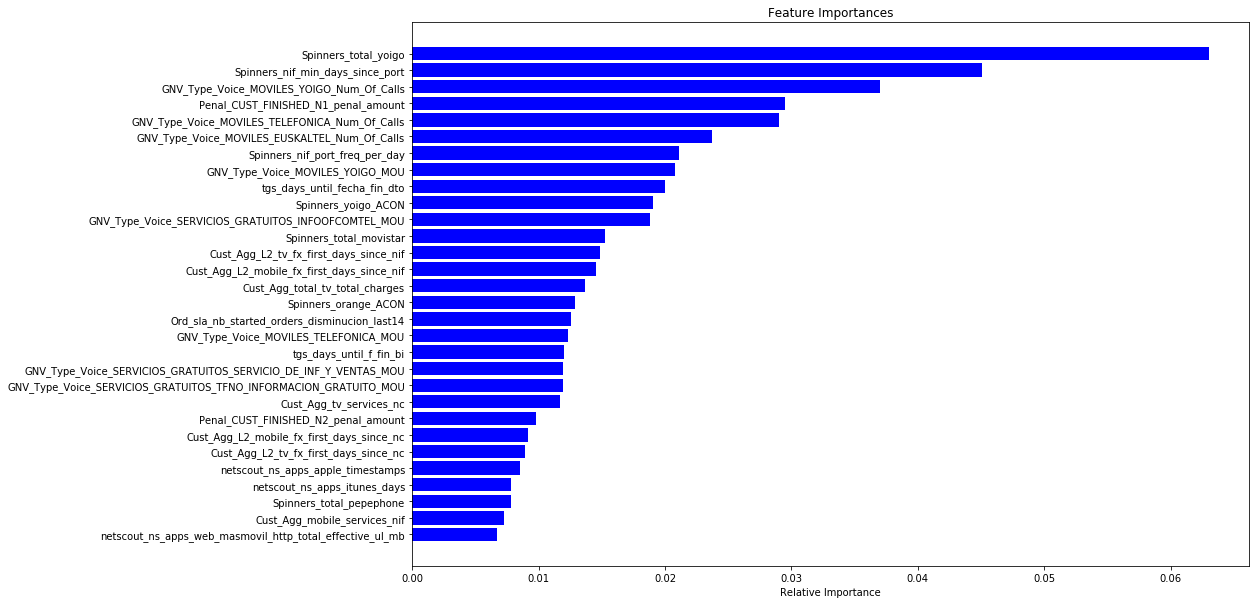

In [53]:
feat_imp=feat_imp_masmovil

features = feat_imp['name']
importances = feat_imp['score']
indices = feat_imp['idx']
plt.figure(figsize=(15, 10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Movistar

In [ ]:
n=float(58318)/float(169429-58318) #proporcion que hay que coger de los que no solicitan porta a masmovil (misma que los que sí: nº clientes que van a masmovil)

train_movistar=train_model2.filter(train_model2['Operador_target']==2).union(train_model2.filter(train_model2['Operador_target']!=2).sample(False, n,5))

In [ ]:
target='movistar'
#model = RandomForestClassifier(featuresCol = 'features', labelCol = target, maxDepth=8, numTrees=3000)
model = GBTClassifier(featuresCol = 'features',labelCol=target, maxDepth=5,maxIter=20)
model2_movistar = model.fit(train_movistar)

In [ ]:
pred_movistar_train=model2_movistar.transform(train_movistar)
pred_movistar_test=model2_movistar.transform(test_model2)

In [ ]:
evaluator = BinaryClassificationEvaluator(labelCol= 'movistar' , metricName='areaUnderROC')

In [ ]:
auc_movistar_train = evaluator.evaluate(pred_movistar_train)
auc_movistar_test = evaluator.evaluate(pred_movistar_test)

In [48]:
auc_movistar_train

0.7343110785205681

In [49]:
auc_movistar_test 

0.7001916991282194

In [ ]:
pred_movistar_test=pred_movistar_test.withColumn("score", getScore(col("probability")).cast(DoubleType()))
pred_movistar_test=pred_movistar_test.orderBy('score',ascending=False)

In [ ]:
lift_movistar = get_lift(pred_movistar_test, 'score', target, 10)

In [55]:
for d ,l in lift_movistar:
   print str(d) + ": " + str(l)

10.0: 2.05171504148
9.0: 1.48418827551
8.0: 1.29617393466
7.0: 1.18257616009
6.0: 1.016805105
5.0: 0.852754245459
4.0: 0.733370696725
3.0: 0.625265533906
2.0: 0.492065619971
1.0: 0.284863689984


In [ ]:
feat_imp_movistar = ExtractFeatureImp(model2_movistar.featureImportances ,pred_movistar_test, "features")[0:30]
feat_imp_movistar = feat_imp_movistar.sort_values(by = ['score'], ascending = True)

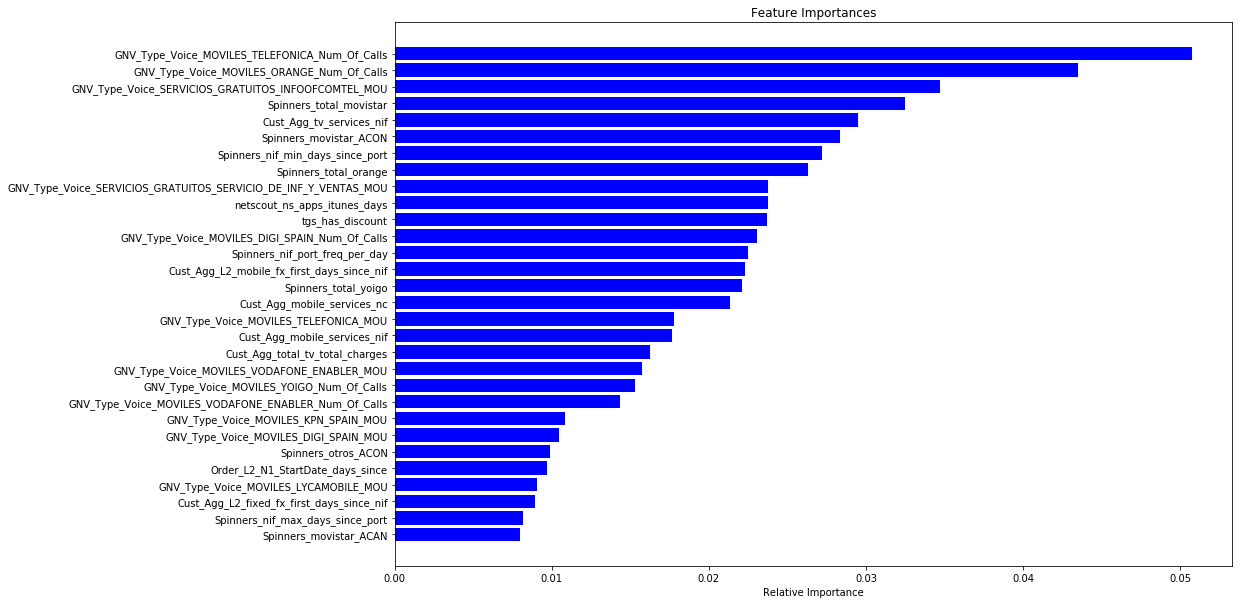

In [54]:
feat_imp=feat_imp_movistar

features = feat_imp['name']
importances = feat_imp['score']
indices = feat_imp['idx']
plt.figure(figsize=(15, 10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Orange

In [ ]:
n=float(51520)/float(210074-51520) #proporcion que hay que coger de los que no solicitan porta a masmovil (misma que los que sí: nº clientes que van a masmovil)

train_orange=train_model2.filter(train_model2['Operador_target']==3).union(train_model2.filter(train_model2['Operador_target']!=3).sample(False, n,5))

In [ ]:
target='orange'
#model = RandomForestClassifier(featuresCol = 'features', labelCol = target, maxDepth=8, numTrees=3000)
model = GBTClassifier(featuresCol = 'features',labelCol=target, maxDepth=5,maxIter=20)
model2_orange = model.fit(train_orange)

In [ ]:
pred_orange_train=model2_orange.transform(train_orange)
pred_orange_test=model2_orange.transform(test_model2)

In [ ]:
evaluator = BinaryClassificationEvaluator(labelCol= 'orange' , metricName='areaUnderROC')

In [ ]:
auc_orange_train = evaluator.evaluate(pred_orange_train)
auc_orange_test = evaluator.evaluate(pred_orange_test)

In [ ]:
auc_orange_train

In [ ]:
auc_orange_test

In [ ]:
pred_orange_test=pred_orange_test.withColumn("score", getScore(col("probability")).cast(DoubleType()))
pred_orange_test=pred_orange_test.orderBy('score',ascending=False)

In [ ]:
lift_orange= get_lift(pred_orange_test, 'score', target, 10)

In [ ]:
for d ,l in lift_orange:
   print str(d) + ": " + str(l)

In [ ]:
feat_imp_orange= ExtractFeatureImp(model2_orange.featureImportances ,pred_orange_test, "features")[0:30]
feat_imp_orange = feat_imp_orange.sort_values(by = ['score'], ascending = True)

In [ ]:
feat_imp=feat_imp_orange

features = feat_imp['name']
importances = feat_imp['score']
indices = feat_imp['idx']
plt.figure(figsize=(15, 10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Otros

In [ ]:
n=float(41079)/float(210074-41079) #proporcion que hay que coger de los que no solicitan porta a masmovil (misma que los que sí: nº clientes que van a masmovil)

train_otros=train_model2.filter(train_model2['Operador_target']==4).union(train_model2.filter(train_model2['Operador_target']!=4).sample(False, n,5))

In [ ]:
target='otros'
#model = RandomForestClassifier(featuresCol = 'features', labelCol = target, maxDepth=8, numTrees=3000)
model = GBTClassifier(featuresCol = 'features',labelCol=target, maxDepth=5,maxIter=20)
model2_otros = model.fit(train_otros)

In [ ]:
pred_otros_train=model2_otros.transform(train_otros)
pred_otros_test=model2_otros.transform(test_model2)

In [ ]:
evaluator = BinaryClassificationEvaluator(labelCol= 'otros' , metricName='areaUnderROC')

In [ ]:
auc_otros_train = evaluator.evaluate(pred_otros_train)
auc_otros_test = evaluator.evaluate(pred_otros_test)

In [ ]:
auc_otros_train

In [ ]:
auc_otros_test

In [ ]:
pred_otros_test=pred_otros_test.withColumn("score", getScore(col("probability")).cast(DoubleType()))
pred_otros_test=pred_otros_test.orderBy('score',ascending=False)

In [ ]:
lift_otros= get_lift(pred_otros_test, 'score', target, 10)

In [ ]:
for d ,l in lift_otros:
   print str(d) + ": " + str(l)

In [ ]:
feat_imp_otros= ExtractFeatureImp(model2_otros.featureImportances ,pred_otros_test, "features")[0:30]
feat_imp_otros = feat_imp_otros.sort_values(by = ['score'], ascending = True)

In [ ]:
feat_imp=feat_imp_otros

features = feat_imp['name']
importances = feat_imp['score']
indices = feat_imp['idx']
plt.figure(figsize=(15, 10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [1]:
26616+25445+25406+30314


107781

In [5]:
float(21508)/float(99265)


0.21667254319246462

In [2]:
5744795-(21508+33103+26206+18448)

5645530